<a href="https://colab.research.google.com/github/NitinVerma2027/PRML-Apr2025/blob/main/ml_ipynb_files/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From (original): https://drive.google.com/uc?id=1gj1rEzLDzNBpRswfqZaJxCFs5EwQSA87
From (redirected): https://drive.google.com/uc?id=1gj1rEzLDzNBpRswfqZaJxCFs5EwQSA87&confirm=t&uuid=e3381cc3-6641-42f8-aaec-80083cb87368
To: /content/dataset.csv
100%|██████████| 110M/110M [00:01<00:00, 79.5MB/s]


   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
Total available samples: 60000
Training data shape: (48000, 784)
Test data shape: (12000, 784)


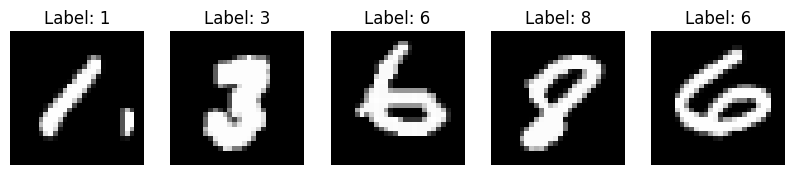

In [1]:
import numpy as np
import gdown
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
from sklearn.model_selection import train_test_split

# File ID from Google Drive
file_id = "1gj1rEzLDzNBpRswfqZaJxCFs5EwQSA87"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "dataset.csv"
gdown.download(url, output, quiet=False)

# Read CSV into Pandas DataFrame
df = pd.read_csv(output, header=None)  # No header in the dataset

# Preview dataset structure
print(df.head())

# Extract labels (first column) and features (remaining columns)
y = df.iloc[:, 0].values  # Labels
X = df.iloc[:, 1:].values  # Features (pixel values)

# Normalize pixel values (0-255 → 0-1)
X = X / 255.0

# Check available dataset size
total_samples = X.shape[0]
print(f"Total available samples: {total_samples}")

# Define split ratios
train_ratio = 0.8  # Use 80% for training, 20% for testing
train_size = int(total_samples * train_ratio)
test_size = total_samples - train_size  # Remaining for testing

# Split dataset while maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, test_size=test_size, stratify=y, random_state=42
)

# Verify shapes
print(f"Training data shape: {X_train.shape}")  # Should be around 80% of total samples
print(f"Test data shape: {X_test.shape}")       # Should be around 20% of total samples

# Display some sample images|
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")

plt.show()


In [2]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
def initialize_parameters(n_features):
    w = np.zeros((n_features, 1))  # Column vector for weights
    b = 0  # Bias
    return w, b

# Compute cost (Log Loss)
def compute_cost(X, y, w, b):
    m = X.shape[0]  # Number of samples
    z = np.dot(X, w) + b  # Linear combination
    y_pred = sigmoid(z)  # Apply sigmoid

    # Clip values to avoid log(0) errors
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Compute cost (Log Loss)
    cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# Compute gradients
def compute_gradients(X, y, w, b):
    m = X.shape[0]  # Number of samples
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    dw = (1 / m) * np.dot(X.T, (y_pred - y))  # Gradient for weights
    db = (1 / m) * np.sum(y_pred - y)  # Gradient for bias

    return dw, db


In [3]:
# Gradient Descent
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    cost_history = []  # Store cost values

    for i in range(num_iterations):
        dw, db = compute_gradients(X, y, w, b)

        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute cost and store it
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return w, b, cost_history


In [ ]:
# Convert labels to One-vs-All format
def one_vs_all_labels(y, digit):
    return (y == digit).astype(int)  # Convert to binary (1 if digit, 0 otherwise)

num_classes = 10
num_iterations = 3000
learning_rate = 0.1

models = []  # Store trained (w, b) for each digit

for digit in range(num_classes):
    print(f"Training model for digit {digit} vs. all...")

    # Convert labels for current digit
    y_train_digit = one_vs_all_labels(y_train, digit).reshape(-1, 1)
    y_test_digit = one_vs_all_labels(y_test, digit).reshape(-1, 1)

    # Initialize weights and bias
    w, b = initialize_parameters(X_train.shape[1])

    # Train logistic regression model
    w_trained, b_trained, _ = gradient_descent(X_train, y_train_digit, w, b, learning_rate, num_iterations)

    # Store trained model
    models.append((w_trained, b_trained))
